# Importing the Libraries

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load Dataset

In [8]:
# load all data
dataset = pd.read_csv(r"G:\smartbridge\Team project (Electricity consumption)\household_power_consumption.txt", sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [13]:
# summarize
dataset.shape

(2075259, 7)

In [14]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [16]:
# mark all missing values
dataset.replace('?', np.nan, inplace=True)

In [17]:
# add a column for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [18]:
# save updated dataset
dataset.to_csv('household_power_consumption.csv')

In [24]:
# load the new file
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

In [25]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [26]:
dataset.shape

(2075259, 8)

# Patterns in Observations Over Time

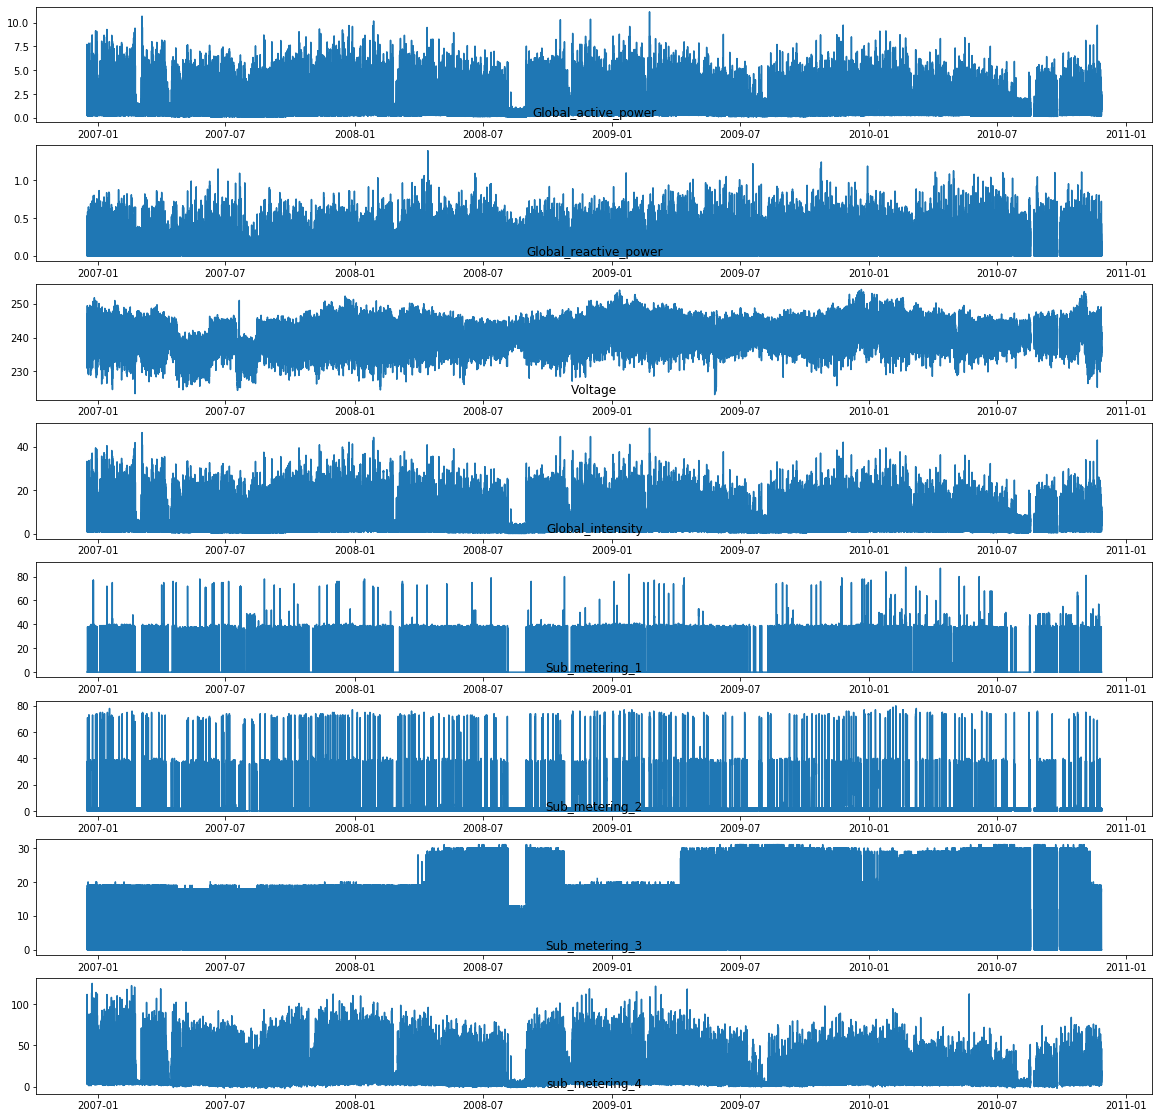

In [34]:
# line plot for each variable
plt.figure(figsize=(20,20))
for i in range(len(dataset.columns)):
	plt.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	plt.plot(dataset[name])
	plt.title(name, y=0)  
plt.show()

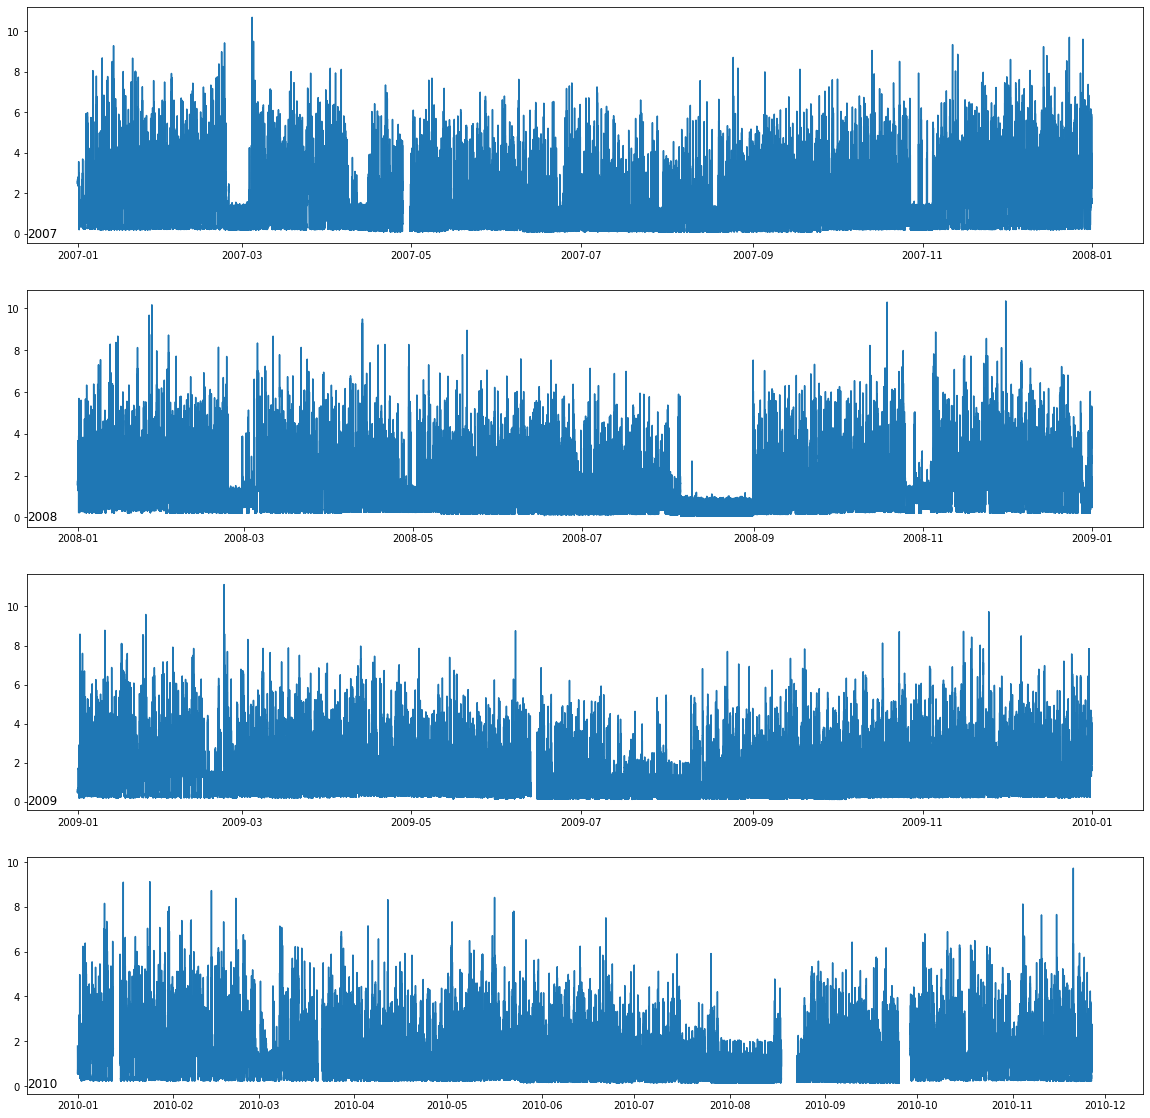

In [36]:
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(20,20))
for i in range(len(years)):
	# prepare subplot
	ax = plt.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[str(year)]
	# plot the active power for the year
	plt.plot(result['Global_active_power'])
	# add a title to the subplot
	plt.title(str(year), y=0, loc='left')
plt.show()

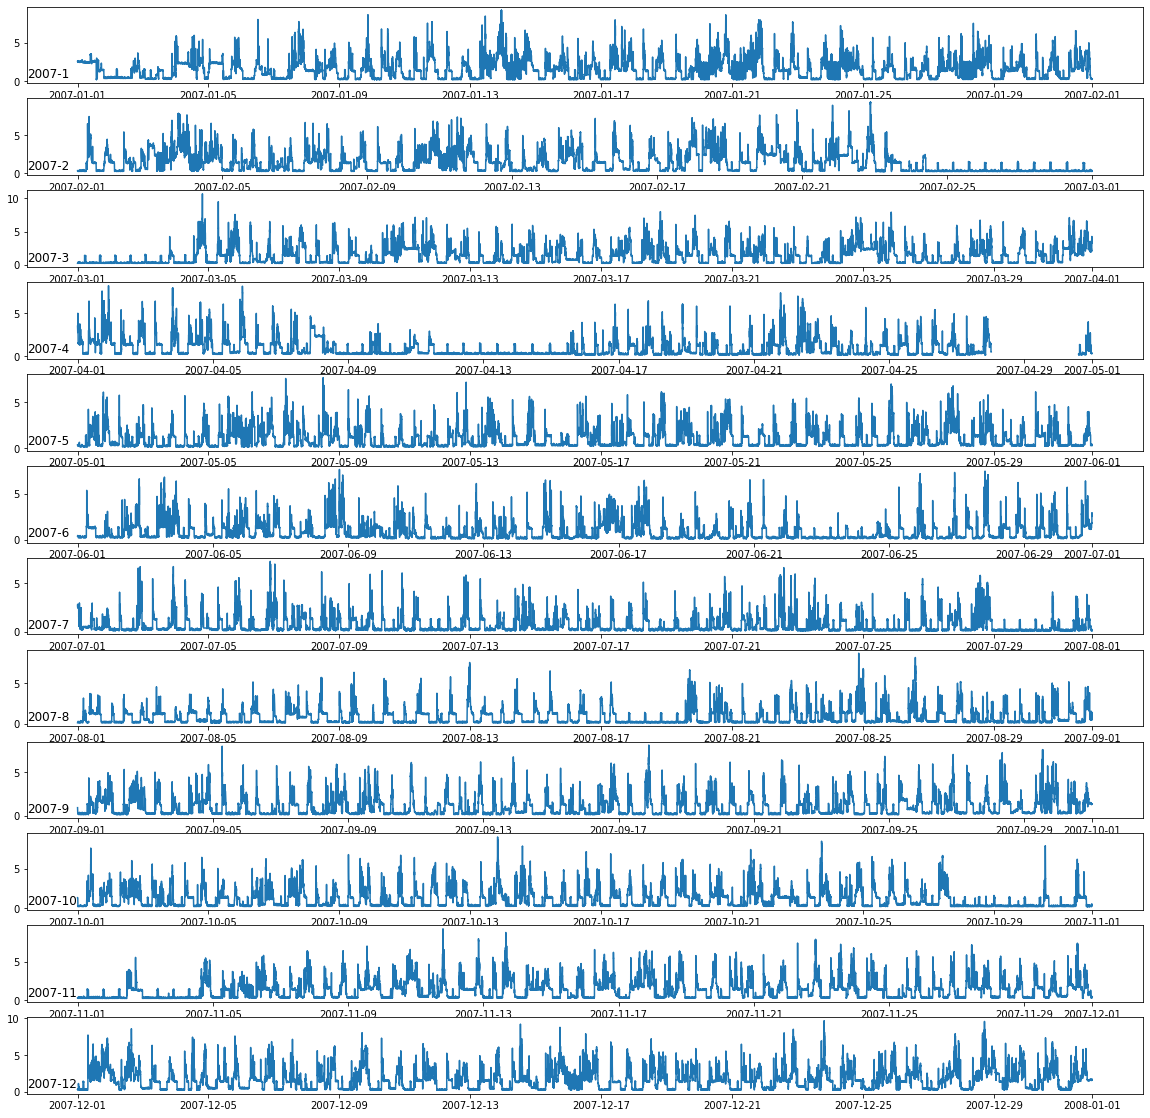

In [37]:
# plot active power for each year
months = [x for x in range(1, 13)]
plt.figure(figsize=(20,20))
for i in range(len(months)):
	# prepare subplot
	ax = plt.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	plt.plot(result['Global_active_power'])
	# add a title to the subplot
	plt.title(month, y=0, loc='left')
plt.show()

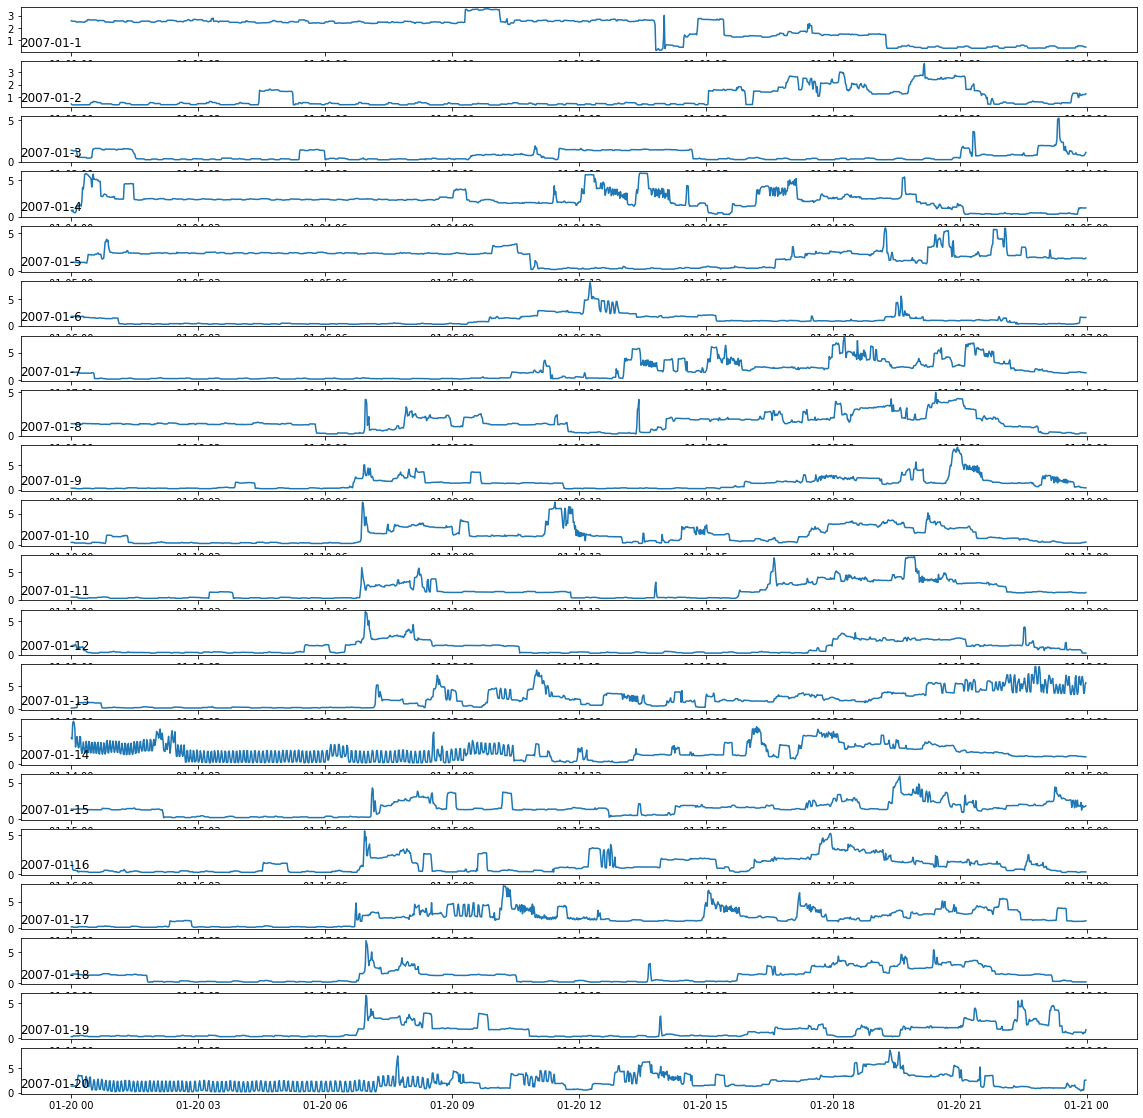

In [39]:
# plot active power for each year
days = [x for x in range(1, 21)]
plt.figure(figsize=(20,20))
for i in range(len(days)):
	# prepare subplot
	ax = plt.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = '2007-01-' + str(days[i])
	# get all observations for the day
	result = dataset[day]
	# plot the active power for the day
	plt.plot(result['Global_active_power'])
	# add a title to the subplot
	plt.title(day, y=0, loc='left')
plt.show()

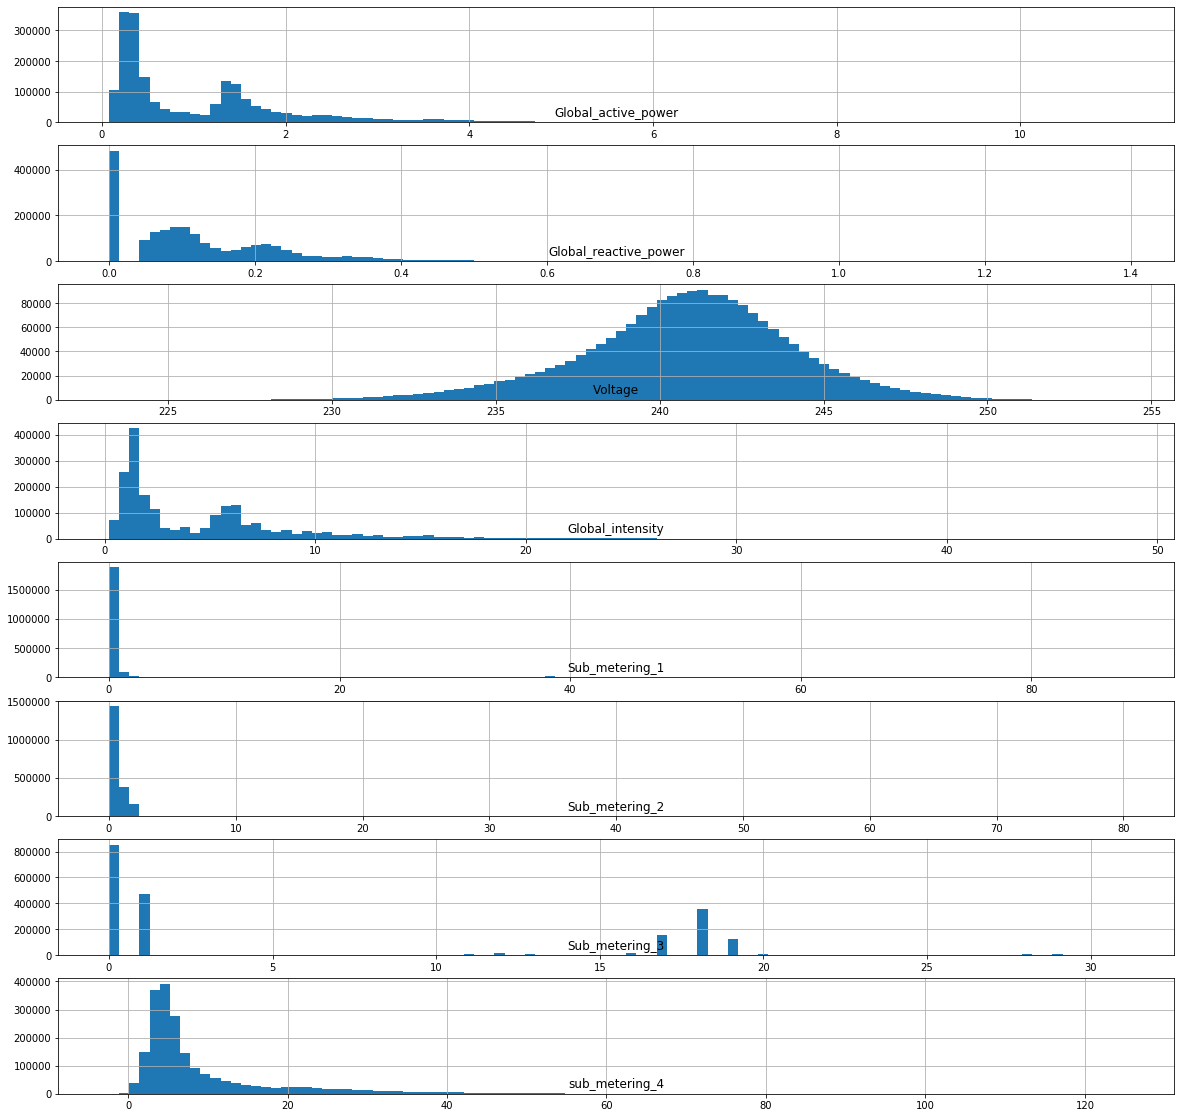

In [40]:
# histogram plot for each variable
plt.figure(figsize=(20,20))
for i in range(len(dataset.columns)):
	plt.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	dataset[name].hist(bins=100)
	plt.title(name, y=0)
plt.show()

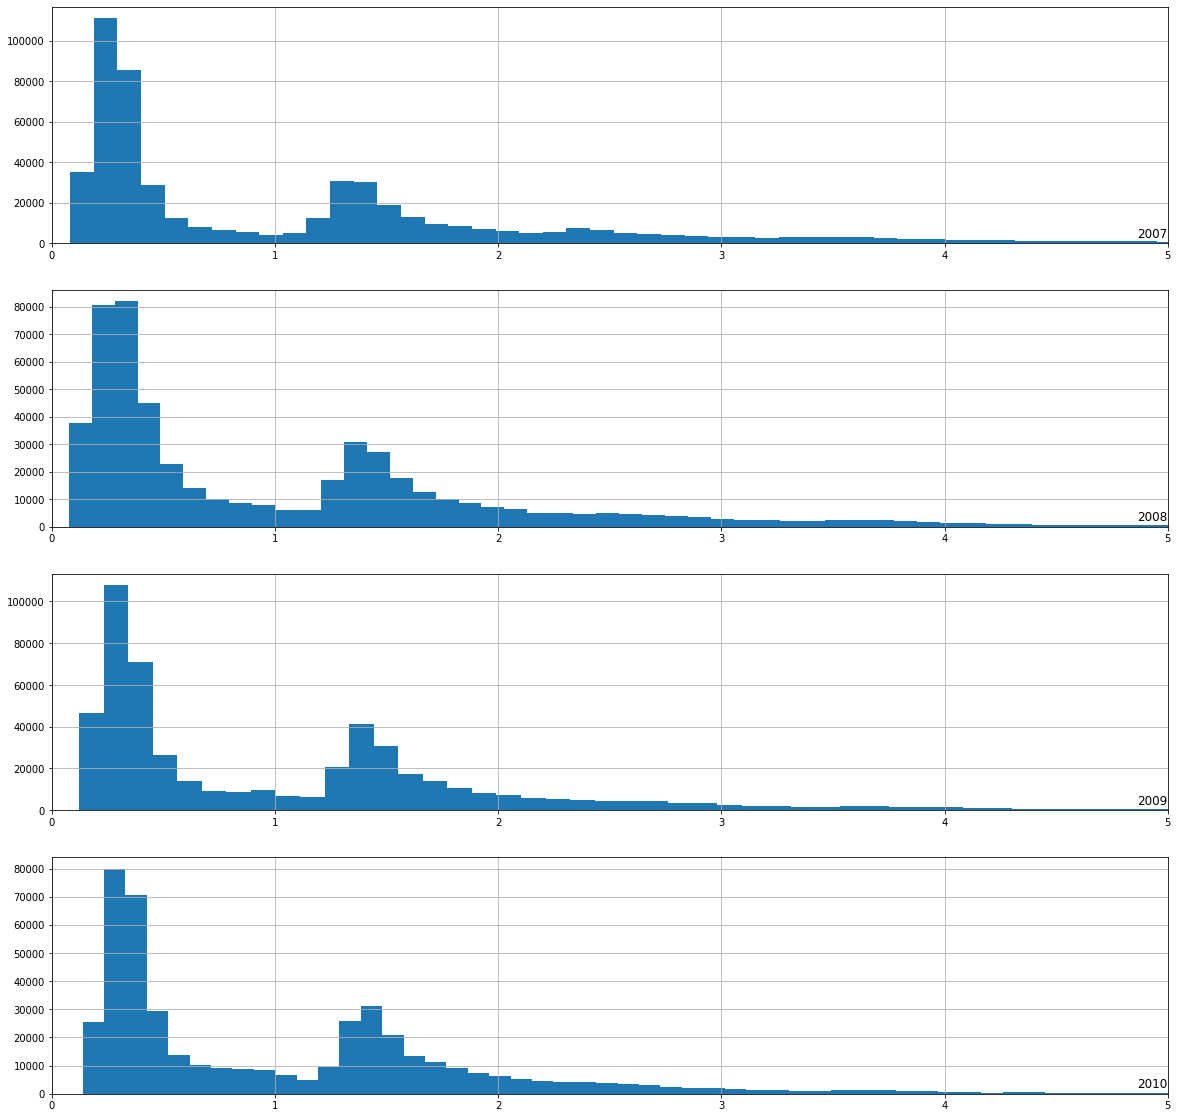

In [41]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(20,20))
for i in range(len(years)):
	# prepare subplot
	ax = plt.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[str(year)]
	# plot the active power for the year
	result['Global_active_power'].hist(bins=100)
	# zoom in on the distribution
	ax.set_xlim(0, 5)
	# add a title to the subplot
	plt.title(str(year), y=0, loc='right')
plt.show()

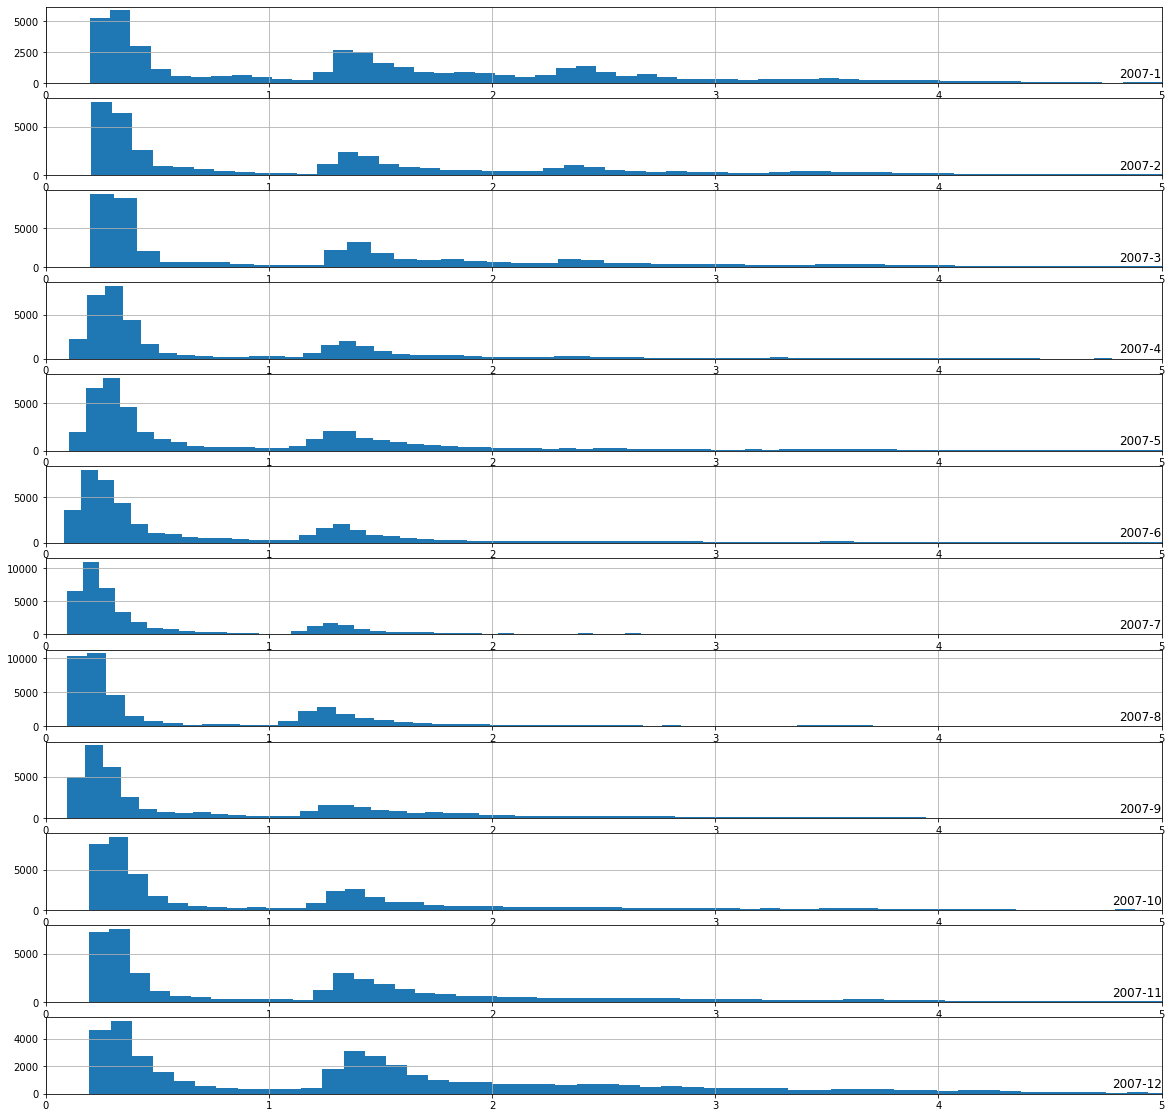

In [43]:
# plot active power for each year
months = [x for x in range(1, 13)]
plt.figure(figsize=(20,20))
for i in range(len(months)):
	# prepare subplot
	ax = plt.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2007-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	result['Global_active_power'].hist(bins=100)
	# zoom in on the distribution
	ax.set_xlim(0, 5)
	# add a title to the subplot
	plt.title(month, y=0, loc='right')
plt.show()

# Data Preprocessing

In [80]:
dataset.isnull().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
sub_metering_4           False
dtype: bool

In [50]:
dataset['Global_active_power'].fillna(dataset['Global_active_power'].mean(),inplace = True)
dataset['Global_reactive_power'].fillna(dataset['Global_reactive_power'].mean(),inplace = True)
dataset['Voltage'].fillna(dataset['Voltage'].mean(),inplace = True)
dataset['Global_intensity'].fillna(dataset['Global_intensity'].mean(),inplace = True)
dataset['Sub_metering_1'].fillna(dataset['Sub_metering_1'].mean(),inplace = True)
dataset['Sub_metering_2'].fillna(dataset['Sub_metering_2'].mean(),inplace = True)
dataset['Sub_metering_3'].fillna(dataset['Sub_metering_3'].mean(),inplace = True)
dataset['sub_metering_4'].fillna(dataset['sub_metering_4'].mean(),inplace = True)

In [51]:
dataset.isnull().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
sub_metering_4           False
dtype: bool

In [52]:
#Defining input and output varibles
x = dataset.iloc[:,1:8].values
y = dataset.iloc[:,0:1].values

In [53]:
x.shape

(2075259, 7)

In [54]:
y.shape

(2075259, 1)

In [79]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00,9.525726e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833333e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.566667e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.023333e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [55]:
#split the data in to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [56]:
x_train.shape

(1660207, 7)

In [57]:
y_train.shape

(1660207, 1)

In [58]:
x_test.shape

(415052, 7)

In [59]:
y_test.shape

(415052, 1)

# MultiLinear Regression learning model

In [61]:
from sklearn.linear_model import LinearRegression
mlr  = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred = mlr.predict(x_test)

In [63]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)

In [64]:
accuracy

0.9999999999999984

In [65]:
mlr.predict([[0.5,239,25,0,2.5,16.5,65]])

array([[5.04]])

# Decision Tree Regression learning Model

In [66]:
from sklearn.tree import  DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [67]:
ydtr = dtr.predict(x_test)

In [68]:
accuratdtr = r2_score(y_test,ydtr)

In [69]:
accuratdtr

0.9996237446736455

In [78]:
dtr.predict([[0.5,239,25,0,2.5,16.5,65]])

array([5.898])